# Extraction of sync stimulus from raw data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne
import os
from mne import combine_evoked
from mne.minimum_norm import apply_inverse
from mne.datasets.brainstorm import bst_auditory
from mne.datasets import multimodal
from mne.io import read_raw_ctf

In [15]:
# multimodal_raw
fname_raw = os.path.join(multimodal.data_path(), 'multimodal_raw.fif')
raw = mne.io.read_raw_fif(fname_raw)
print(raw.info['bads'])

Opening raw data file /home/rickbook/mne_data/MNE-multimodal-data/multimodal_raw.fif...
    Read a total of 7 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
    Range : 183600 ... 576599 =    305.687 ...   960.014 secs
Ready.
[]


In [16]:
mne.AcqParserFIF(raw.info)

<AcqParserFIF | categories: 20 (8 in use), events: 17 (8 in use)
Averaging categories:
1: "Visual Upper right"
2: "Visual Lower right"
3: "Visual Lower left"
4: "Visual Upper left"
5: "Somato right"
6: "Somato left"
7: "Auditory right"
8: "Auditory left">

In [13]:
# preprocess bad channels   
# replaces the data from the bad channels with interpolated values based on the surrounding channels
# raw.info['bads']
# mne.channels.interpolation.interpolate_bads(raw, reset_bads=True)

[]

In [33]:
# Set the parameters for epoching
tmin, tmax = -0.1, 0.5  # Time window around the event onset

baseline = (None ,0) # Baseline correction
# baseline_mode = 'zscore' # Baseline correction

# Find the stim channel
stim_channel = mne.pick_types(raw.info, meg=False, stim=True)

print(stim_channel)


# Define the events based on the stimulus triggers
events = mne.find_events(raw, shortest_event=1, verbose=True)

[306 307 308 309 310 311 312 313 314]
942 events found
Event IDs: [ 1  2  3  4  5  8 16 32]


In [56]:
len(events)

raw.info

<Info | 22 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 acq_stim: 5 10.000000 500.000000 6 10.000000 500.000000
 bads: []
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 1 EOG
 custom_ref_applied: False
 description: Vectorview system at BioMag
 dev_head_t: MEG device -> head transform
 dig: 3 items (3 Cardinal)
 events: 1 item (list)
 experimenter: neuromag
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2011-04-26 11:33:18 UTC
 meas_id: 4 items (dict)
 nchan: 316
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: grad_ssp_upright.fif : PCA-v1: off, grad_ssp_upright.fif : ...
 sfreq: 600.6 Hz
 subject_info: 9 items (dict)
>

In [39]:
# Create the epochs object
# epochs by segmenting the continuous data into time-locked

reject = dict(mag=4e-12, eog=250e-6)
event_id = {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '8': 8, '16': 16, '32': 32}

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, picks=['meg', 'eog'],
                    baseline=baseline, reject=reject, preload=False,
                    proj=True)

event_id = epochs.event_id


Not setting metadata
942 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 7)
7 projection items activated


In [36]:
event_id

{'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '8': 8, '16': 16, '32': 32}

In [40]:
"""Resampling

    Resampling can be useful for a variety of reasons, such as
    reducing the computational load, aligning data from different 
    sources, or preparing the data for a specific analysis.

    The resample function in MNE-Python has the following syntax:

    new_raw = raw.resample(sfreq_new, npad='auto')

"""


epochs.drop_bad()

epochs.set_annotations(None)

epochs_resampled = epochs['1'].copy()
epochs_resampled.load_data()
epochs_resampled.resample(600, npad='auto')

evoked_std = epochs_resampled.average()

Loading data for 942 events and 421 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1121', 'MEG 1541']
    Rejecting  epoch based on MAG : ['MEG 1121', 'MEG 1541']
    Rejecting  epoch based on MAG : ['MEG 1121', 'MEG 1541']
    Rejecting  epoch based on MAG : ['MEG 2141']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1121', 'MEG 1541']
    Rejecting  epoch based on MAG : ['MEG 1121', 'MEG 1541']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1121', 'MEG 1541']
    Rejecting  epoch based on MAG : ['MEG 1121', 'MEG 1541']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1121', 'MEG 1541']
    Rejecting  epoch based on MAG : ['MEG 1121', 'MEG 1541']
    R

In [42]:
"""
    to remove high-frequency noise and artifacts that are not relevant for the analysis 
    of the neural signals. The choice of 40 Hz as the cutoff frequency is based on the 
    fact that most of the relevant frequency components of the EEG and MEG signals are 
    below this frequency, especially for resting-state or task-related brain activity.
"""

evoked_std.filter(l_freq=None, h_freq=40., fir_design='firwin')

Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 199 samples (0.332 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    0.0s finished


<Evoked | '1' (average, N=96), -0.1998 – 0.5002 sec, baseline -0.199795 – 0 sec, 306 ch, ~4.3 MB>

In [ ]:
# Set the fiducial points
fiducials = {
    'nasion': [0., 0., 0.],
    'lpa': [-0.07, -0.88, 0.],
    'rpa': [0.07, -0.88, 0.]
}

subject = 'MNE-multimodal-data'
subjects_dir = '/home/rickbook/mne_data/MNE-multimodal-data/'

# Perform automated digitization to estimate the head surface
montage = mne.channels.make_standard_montage('standard_1005')
raw.set_montage(montage)
raw.set_channel_types({'EOG 061': 'eog'})
# raw.set_eog_reference(ref_channels='average')
# raw.load_data()
# raw.plot_sensors()
# raw = mne.preprocessing.ICA(raw, random_state=0).apply()
conductivity = [0.3]  # scalp, skull, brain conductivity values
model = mne.make_bem_model(raw.info, conductivity=conductivity, ico=None)
bem = mne.make_bem_solution(model)

# Perform the coregistration and calculate the transformation matrix
trans = mne.coreg.compute_trans(
    raw=raw, subject=None, subjects_dir=None,
    mri=None, surface=None, bem=bem, fiducials=fiducials,
    eeg=True, meg=True, verbose=True
)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from os.path import join

import mne
from mne.decoding import ReceptiveField
from sklearn.model_selection import KFold
from sklearn.preprocessing import scale

# source: https://sourceforge.net/projects/aespa/files/
# https://mne.tools/stable/auto_examples/decoding/receptive_field_mtrf.html#ex-receptive-field-mtrf
# mne.decoding.ReceptiveField class as we try to predict the stimulus activity from the EEG data
# https://www.frontiersin.org/articles/10.3389/fnhum.2016.00604/full # Regularized Linear Regression
# use a reularized linear regression to predict the brain activity from the stimulus



Using default location ~/mne_data for mtrf...


100%|█████████████████████████████████████| 58.1M/58.1M [00:00<00:00, 53.5GB/s]
Unzipping contents of '/home/rickbook/mne_data/mTRF_1.5.zip' to '/home/rickbook/mne_data'


Creating RawArray with float64 data, n_channels=128, n_times=7677
    Range : 0 ... 7676 =      0.000 ...   119.938 secs
Ready.


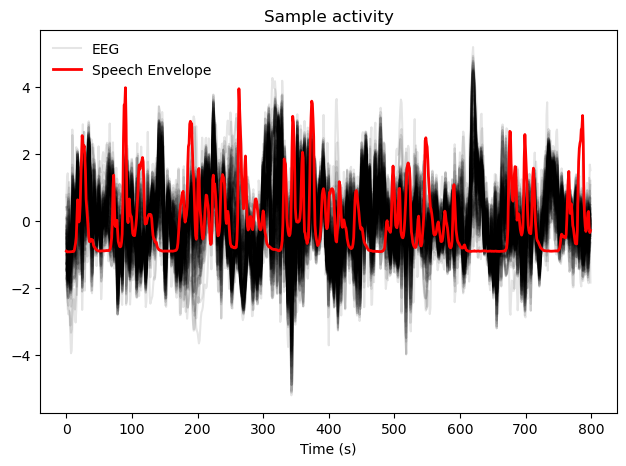

In [2]:
path = mne.datasets.mtrf.data_path()
decim = 2
data = loadmat(join(path, 'speech_data.mat'))
raw = data['EEG'].T
speech = data['envelope'].T
sfreq = float(data['Fs'])
sfreq /= decim
speech = mne.filter.resample(speech, down=decim, npad='auto')
raw = mne.filter.resample(raw, down=decim, npad='auto')

# Read in channel positions and create our MNE objects from the raw data
montage = mne.channels.make_standard_montage('biosemi128')
info = mne.create_info(montage.ch_names, sfreq, 'eeg').set_montage(montage)
raw = mne.io.RawArray(raw, info)

n_channels = len(raw.ch_names)

# Plot a sample of brain and stimulus activity
fig, ax = plt.subplots()
lns = ax.plot(scale(raw[:, :800][0].T), color='k', alpha=.1)
ln1 = ax.plot(scale(speech[0, :800]), color='r', lw=2)
ax.legend([lns[0], ln1[0]], ['EEG', 'Speech Envelope'], frameon=False)
ax.set(title="Sample activity", xlabel="Time (s)")
mne.viz.tight_layout()

In [15]:
clas




speech.shape

(7677, 1)

In [13]:
raw[:,:][0].shape

(128, 7677)

split 1 / 3
Fitting 1 epochs, 1 channels


  0%|          | Sample : 0/2 [00:00<?,       ?it/s]

split 2 / 3
Fitting 1 epochs, 1 channels


  0%|          | Sample : 0/2 [00:00<?,       ?it/s]

split 3 / 3
Fitting 1 epochs, 1 channels


  0%|          | Sample : 0/2 [00:00<?,       ?it/s]

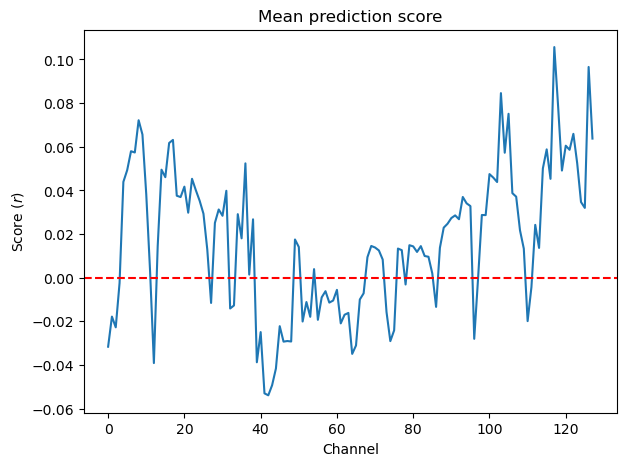

In [3]:
# Define the delays that we will use in the receptive field
tmin, tmax = -.2, .4

# Initialize the model
rf = ReceptiveField(tmin, tmax, sfreq, feature_names=['envelope'],
                    estimator=1., scoring='corrcoef')
# We'll have (tmax - tmin) * sfreq delays
# and an extra 2 delays since we are inclusive on the beginning / end index
n_delays = int((tmax - tmin) * sfreq) + 2

n_splits = 3
cv = KFold(n_splits)

# Prepare model data (make time the first dimension)
speech = speech.T
Y, _ = raw[:]  # Outputs for the model
Y = Y.T

# Iterate through splits, fit the model, and predict/test on held-out data
coefs = np.zeros((n_splits, n_channels, n_delays))
scores = np.zeros((n_splits, n_channels))
for ii, (train, test) in enumerate(cv.split(speech)):
    print('split %s / %s' % (ii + 1, n_splits))
    rf.fit(speech[train], Y[train])
    scores[ii] = rf.score(speech[test], Y[test])
    # coef_ is shape (n_outputs, n_features, n_delays). we only have 1 feature
    coefs[ii] = rf.coef_[:, 0, :]
times = rf.delays_ / float(rf.sfreq)

# Average scores and coefficients across CV splits
mean_coefs = coefs.mean(axis=0)
mean_scores = scores.mean(axis=0)

# Plot mean prediction scores across all channels
fig, ax = plt.subplots()
ix_chs = np.arange(n_channels)
ax.plot(ix_chs, mean_scores)
ax.axhline(0, ls='--', color='r')
ax.set(title="Mean prediction score", xlabel="Channel", ylabel="Score ($r$)")
mne.viz.tight_layout()

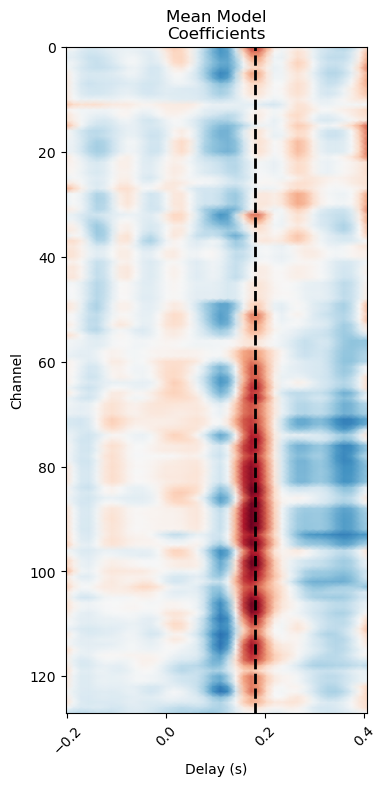

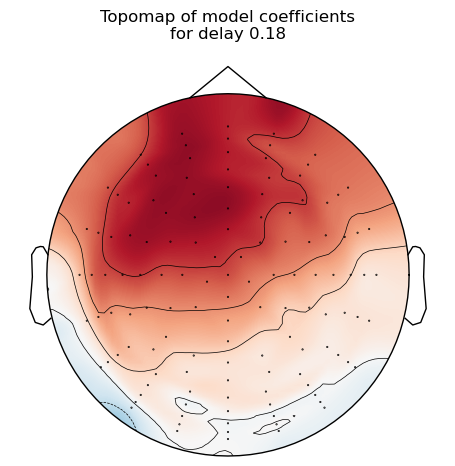

In [4]:
# Print mean coefficients across all time delays / channels (see Fig 1)
time_plot = 0.180  # For highlighting a specific time.
fig, ax = plt.subplots(figsize=(4, 8))
max_coef = mean_coefs.max()
ax.pcolormesh(times, ix_chs, mean_coefs, cmap='RdBu_r',
              vmin=-max_coef, vmax=max_coef, shading='gouraud')
ax.axvline(time_plot, ls='--', color='k', lw=2)
ax.set(xlabel='Delay (s)', ylabel='Channel', title="Mean Model\nCoefficients",
       xlim=times[[0, -1]], ylim=[len(ix_chs) - 1, 0],
       xticks=np.arange(tmin, tmax + .2, .2))
plt.setp(ax.get_xticklabels(), rotation=45)
mne.viz.tight_layout()

# Make a topographic map of coefficients for a given delay (see Fig 2C)
ix_plot = np.argmin(np.abs(time_plot - times))
fig, ax = plt.subplots()
mne.viz.plot_topomap(mean_coefs[:, ix_plot], pos=info, axes=ax, show=False,
                     vlim=(-max_coef, max_coef))
ax.set(title="Topomap of model coefficients\nfor delay %s" % time_plot)
mne.viz.tight_layout()

## extract the events

In [5]:
# We use the same lags as in :footcite:`CrosseEtAl2016`. Negative lags now
# index the relationship
# between the neural response and the speech envelope earlier in time, whereas
# positive lags would index how a unit change in the amplitude of the EEG would
# affect later stimulus activity (obviously this should have an amplitude of
# zero).
tmin, tmax = -.2, 0.

# Initialize the model. Here the features are the EEG data. We also specify
# ``patterns=True`` to compute inverse-transformed coefficients during model
# fitting (cf. next section and :footcite:`HaufeEtAl2014`).
# We'll use a ridge regression estimator with an alpha value similar to
# Crosse et al.
sr = ReceptiveField(tmin, tmax, sfreq, feature_names=raw.ch_names,
                    estimator=1e4, scoring='corrcoef', patterns=True)
# We'll have (tmax - tmin) * sfreq delays
# and an extra 2 delays since we are inclusive on the beginning / end index
n_delays = int((tmax - tmin) * sfreq) + 2

n_splits = 3
cv = KFold(n_splits)

# Iterate through splits, fit the model, and predict/test on held-out data
coefs = np.zeros((n_splits, n_channels, n_delays))
patterns = coefs.copy()
scores = np.zeros((n_splits,))
for ii, (train, test) in enumerate(cv.split(speech)):
    print('split %s / %s' % (ii + 1, n_splits))
    sr.fit(Y[train], speech[train])
    scores[ii] = sr.score(Y[test], speech[test])[0]
    # coef_ is shape (n_outputs, n_features, n_delays). We have 128 features
    coefs[ii] = sr.coef_[0, :, :]
    patterns[ii] = sr.patterns_[0, :, :]
times = sr.delays_ / float(sr.sfreq)

# Average scores and coefficients across CV splits
mean_coefs = coefs.mean(axis=0)
mean_patterns = patterns.mean(axis=0)
mean_scores = scores.mean(axis=0)
max_coef = np.abs(mean_coefs).max()
max_patterns = np.abs(mean_patterns).max()

split 1 / 3
Fitting 1 epochs, 128 channels


  0%|          | Sample : 0/8384 [00:00<?,       ?it/s]

split 2 / 3
Fitting 1 epochs, 128 channels


  0%|          | Sample : 0/8384 [00:00<?,       ?it/s]

split 3 / 3
Fitting 1 epochs, 128 channels


  0%|          | Sample : 0/8384 [00:00<?,       ?it/s]

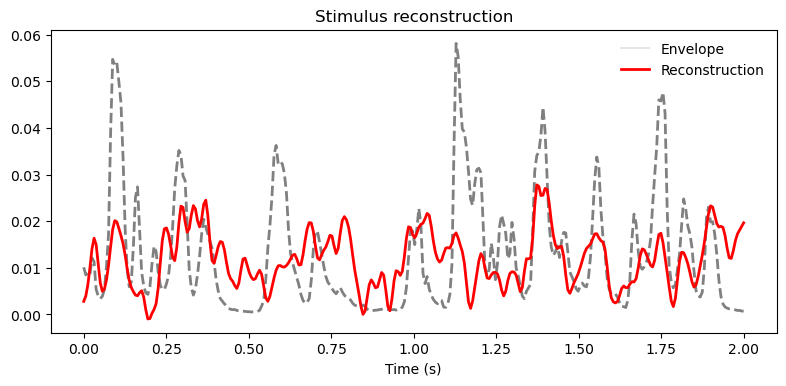

In [6]:
y_pred = sr.predict(Y[test])
time = np.linspace(0, 2., 5 * int(sfreq))
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(time, speech[test][sr.valid_samples_][:int(5 * sfreq)],
        color='grey', lw=2, ls='--')
ax.plot(time, y_pred[sr.valid_samples_][:int(5 * sfreq)], color='r', lw=2)
ax.legend([lns[0], ln1[0]], ['Envelope', 'Reconstruction'], frameon=False)
ax.set(title="Stimulus reconstruction")
ax.set_xlabel('Time (s)')
mne.viz.tight_layout()

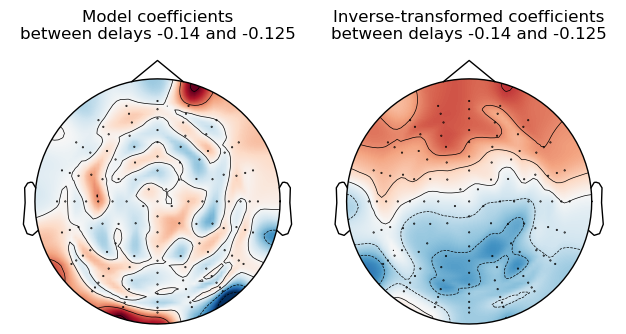

In [7]:
time_plot = (-.140, -.125)  # To average between two timepoints.
ix_plot = np.arange(np.argmin(np.abs(time_plot[0] - times)),
                    np.argmin(np.abs(time_plot[1] - times)))
fig, ax = plt.subplots(1, 2)
mne.viz.plot_topomap(np.mean(mean_coefs[:, ix_plot], axis=1),
                     pos=info, axes=ax[0], show=False,
                     vlim=(-max_coef, max_coef))
ax[0].set(title="Model coefficients\nbetween delays %s and %s"
          % (time_plot[0], time_plot[1]))

mne.viz.plot_topomap(np.mean(mean_patterns[:, ix_plot], axis=1),
                     pos=info, axes=ax[1],
                     show=False, vlim=(-max_patterns, max_patterns))
ax[1].set(title="Inverse-transformed coefficients\nbetween delays %s and %s"
          % (time_plot[0], time_plot[1]))
mne.viz.tight_layout()